In [1]:
### import necessary packages ###
#%matplotlib notebook
import matplotlib.pylab as plt  ##plotting 
from rawice import *            ##all modules from rawice.py
import warnings
import numpy as np
import os
from scipy.optimize import curve_fit

warnings.filterwarnings('ignore')

In [2]:
## location of raw acq data
notebook_path = os.path.abspath("7.20 1000 fps.ipyn")
folder_path = os.path.join(os.path.dirname(notebook_path), "7.20 1000 fps/")
path = os.path.join(os.path.dirname(notebook_path), "7.20 1000 fps/000000")
## File 000006 is bad for some reason

## load data from file to object 'acq'
acq = raw_acq(path)
#help(raw_acq)
acq.adc_input

#set the input 
tm4_input = [0,0,12]
tm5101_input = [0,0,3]
chime_input = [0,0,7]
leo_input = [0,0,15]

Loaded raw acq HDF5 file ... 


# TM-4 Lab

In [3]:
tm4 = acq.check_input(tm4_input)
tm4.inspect_maser()

Checking input [0, 0, 12] ... 


In [4]:
tm4.get_curve_fit()

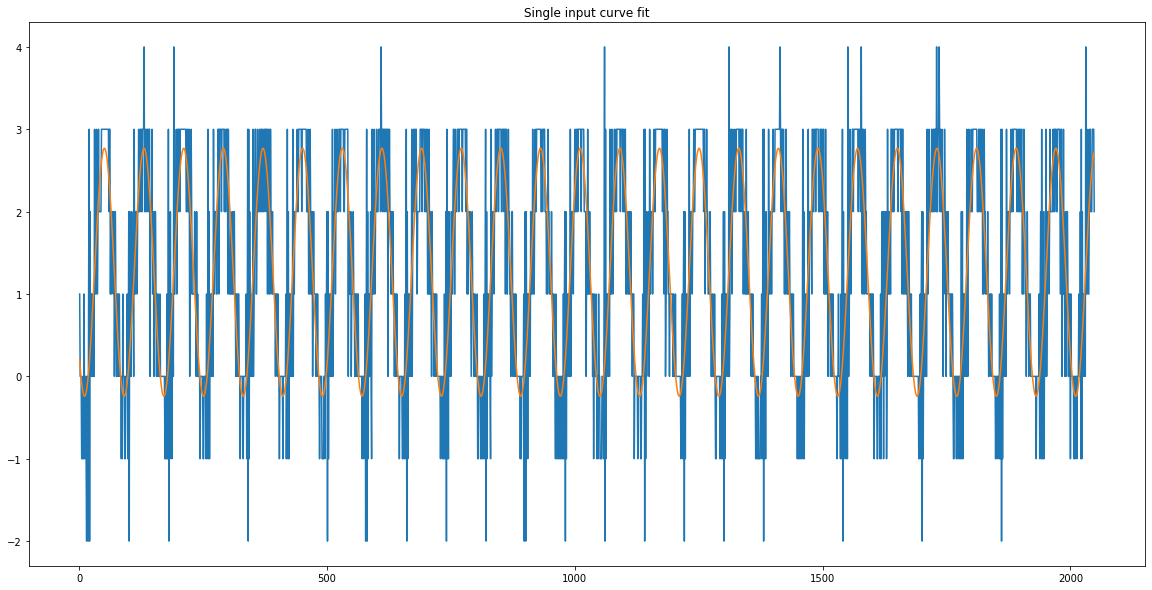

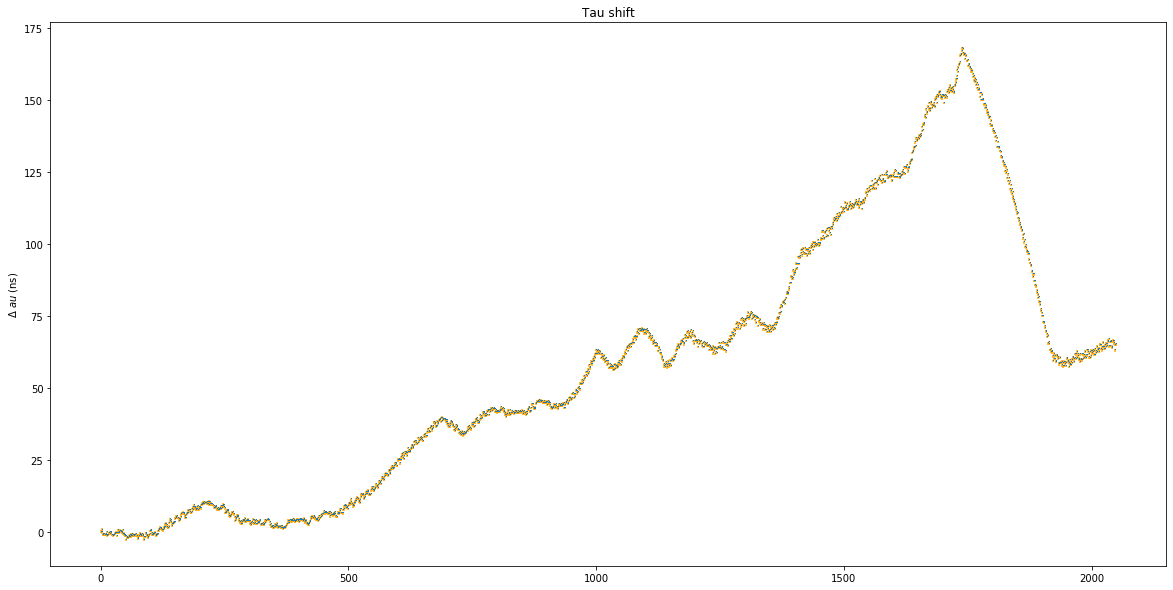

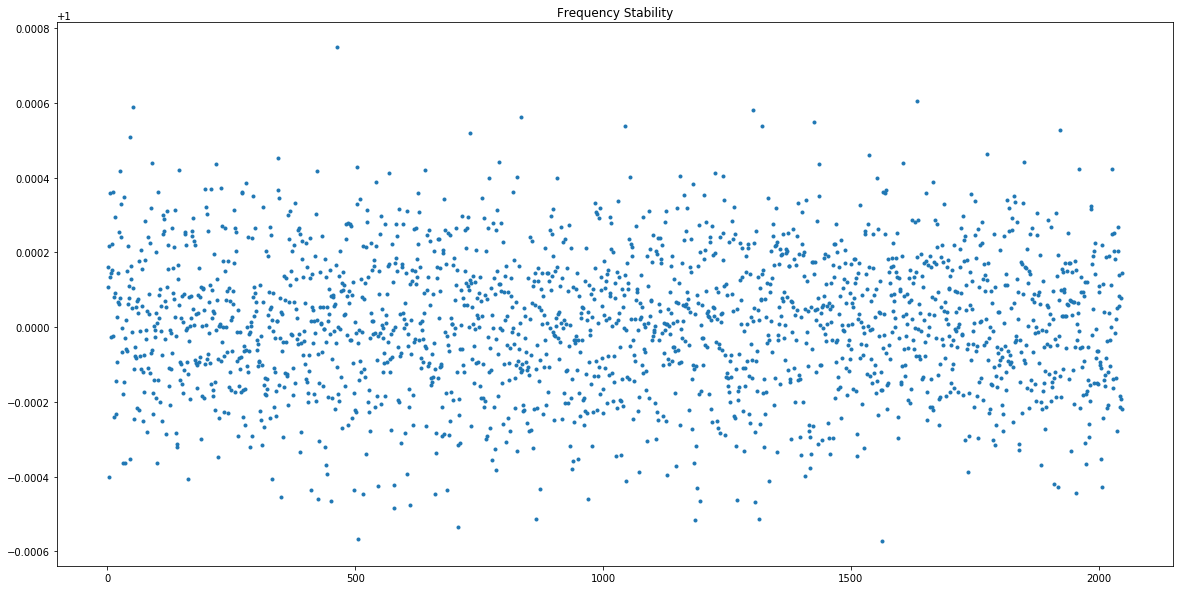

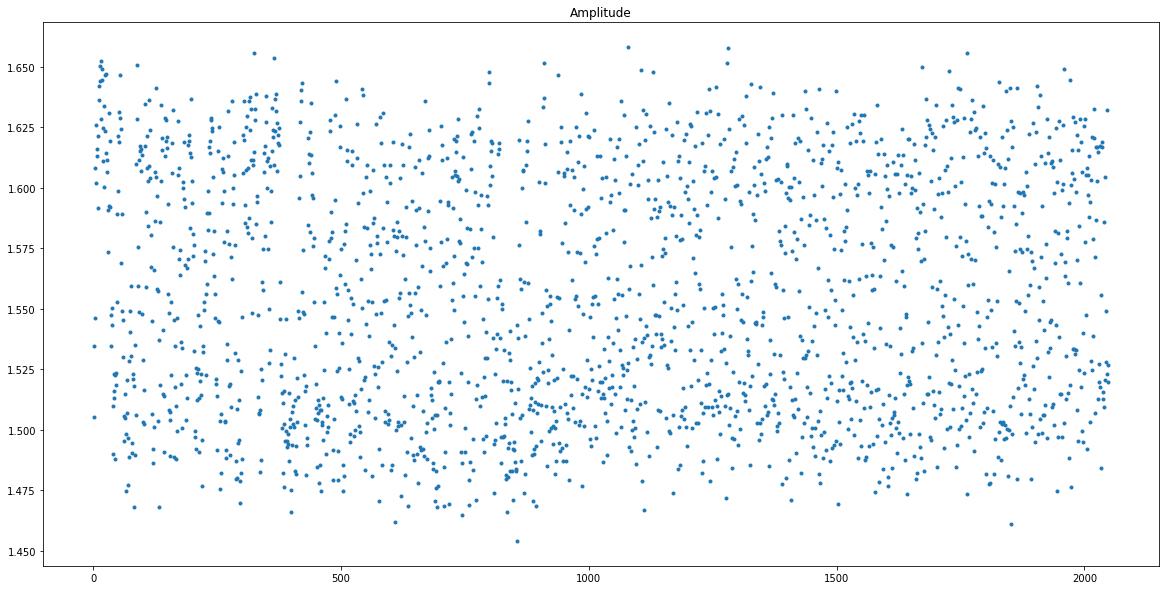

In [5]:
tm4.get_single_curve_fit(i=0)

In [6]:
tm4_clock = analyse_maser(folder_path, tm4_input, 1)

C:\Users\audre\Documents\WVU REU 2022\7.20 1000 fps\000000
Loaded raw acq HDF5 file ... .....................................................................] 0/1
Checking input [0, 0, 12] ... 
Done Computing Delay: ############################################################################] 1/1

DONE reading files and getting delays


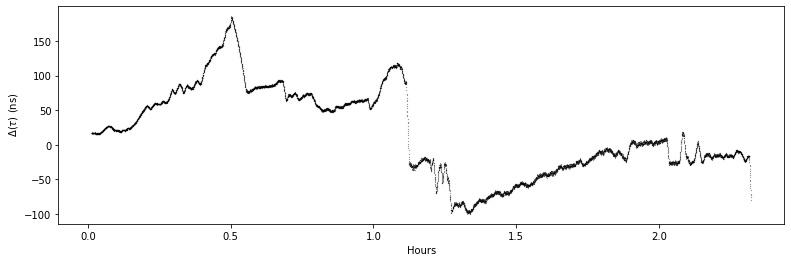

In [7]:
tm4_clock.plot_delays()

Text(0, 0.5, ' $\\Delta(\\tau)$ (ns)')

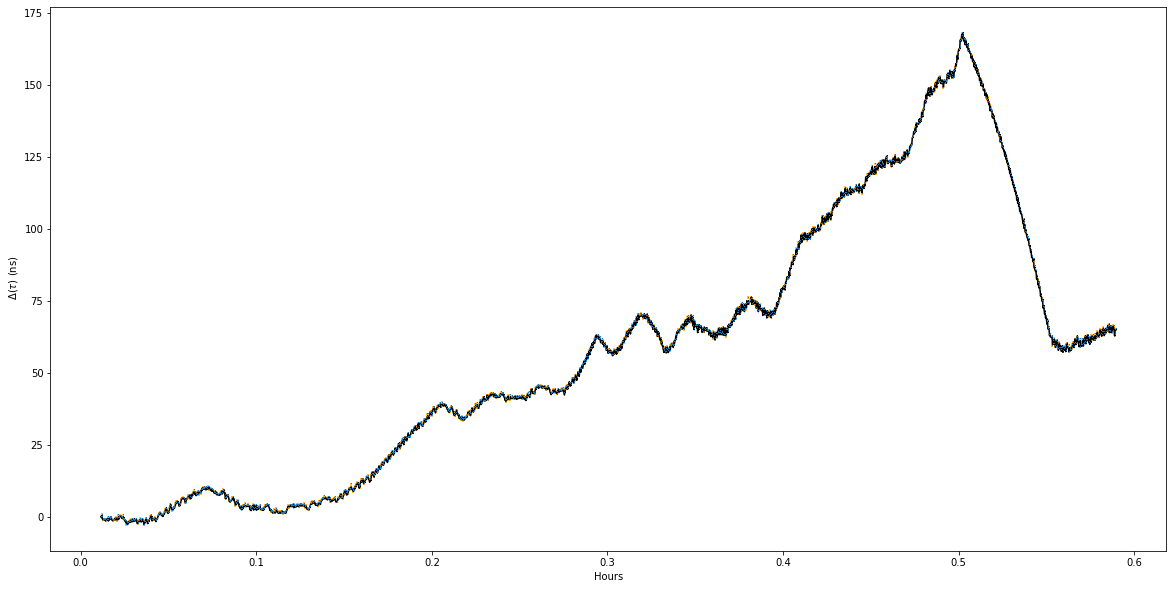

In [8]:
xlist = [val for val in range(0+1, 2049)]
xval = [(val*(1.25e-9)/60/60) for val in xlist]

fig, ax = plt.subplots(figsize=(20,10))      #HEY LOOK AT THIS!!!!
plt.plot(tm4_clock.fpgatime[:2048]*2.56e-6/60/60, (tm4_clock.taus[:2048])-tm4_clock.taus[0], c = 'k', marker = ',')
ax.errorbar(tm4_clock.fpgatime[:2048]*2.56e-6/60/60, np.array(tm4.tau_shift[:2048])-tm4.tau_shift[0], yerr=tm4.tau_err[:2048], fmt=',', ecolor='orange')
plt.plot()
plt.xlabel("Hours")
plt.ylabel(r" $\Delta(\tau)$ (ns)")

# TM-5101

In [9]:
tm5101 = acq.check_input(tm5101_input)
tm5101.inspect_maser()

Checking input [0, 0, 3] ... 


In [10]:
tm5101.get_curve_fit()

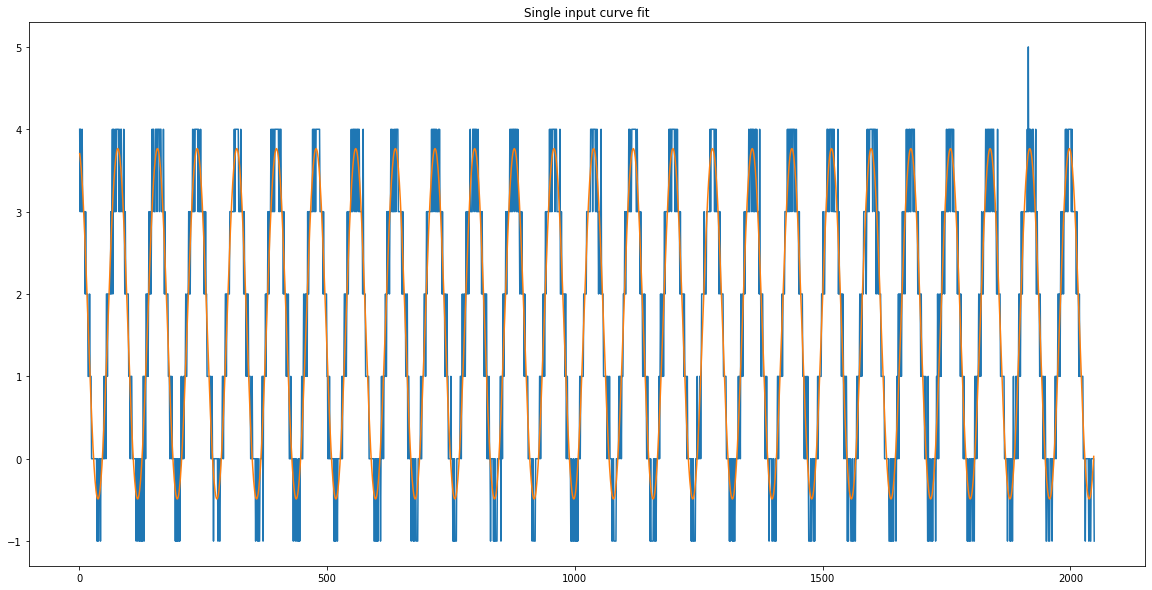

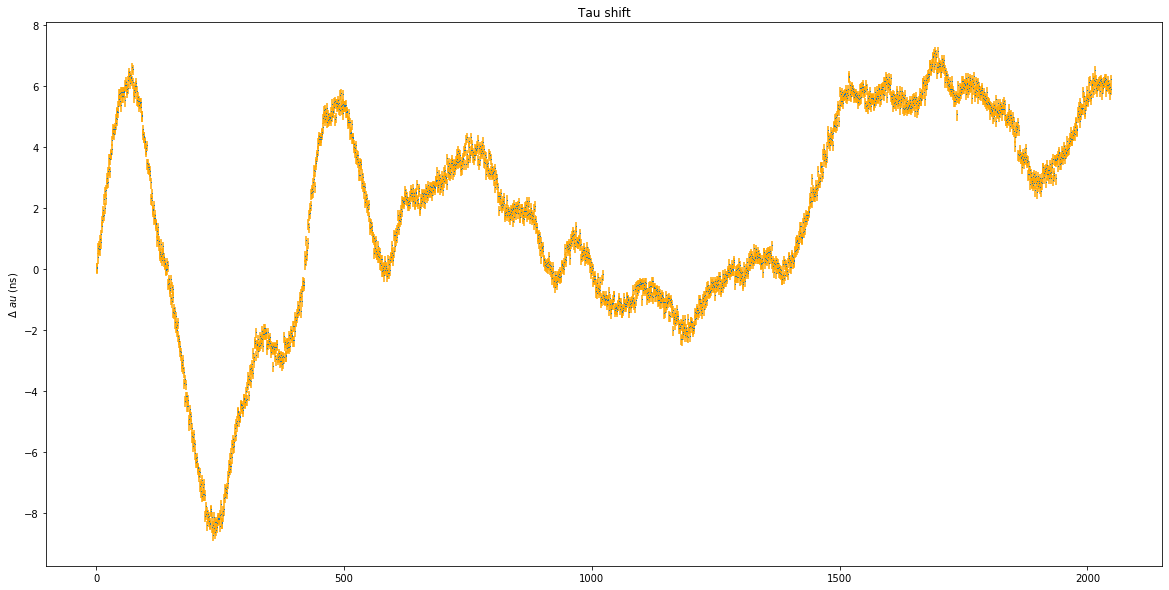

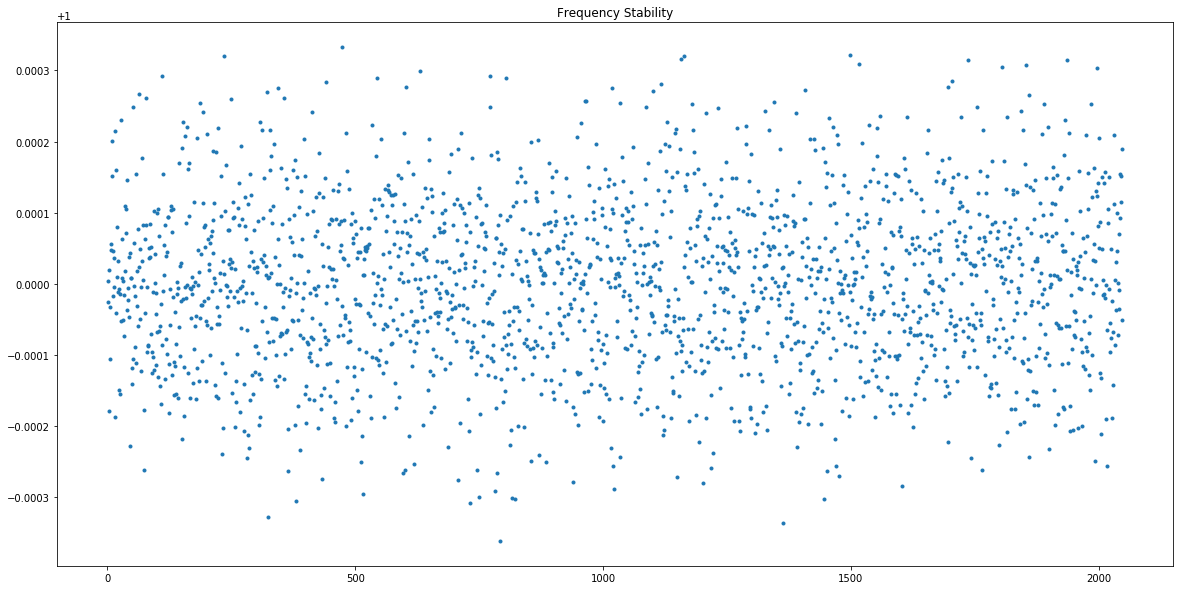

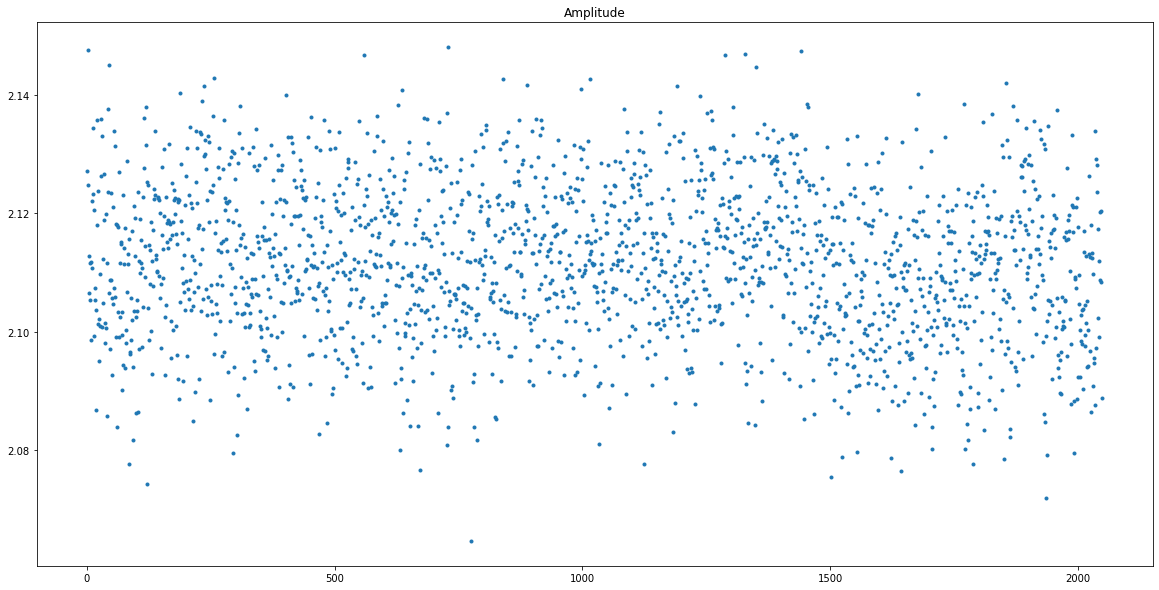

In [11]:
tm5101.get_single_curve_fit(i=0)

In [12]:
tm5101_clock = analyse_maser(folder_path, tm5101_input, 1)

C:\Users\audre\Documents\WVU REU 2022\7.20 1000 fps\000000
Loaded raw acq HDF5 file ... .....................................................................] 0/1
Checking input [0, 0, 3] ... 
Done Computing Delay: ############################################################################] 1/1

DONE reading files and getting delays


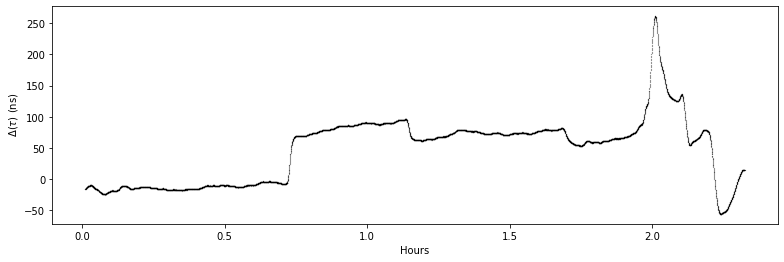

In [13]:
tm5101_clock.plot_delays()

Text(0, 0.5, ' $\\Delta(\\tau)$ (ns)')

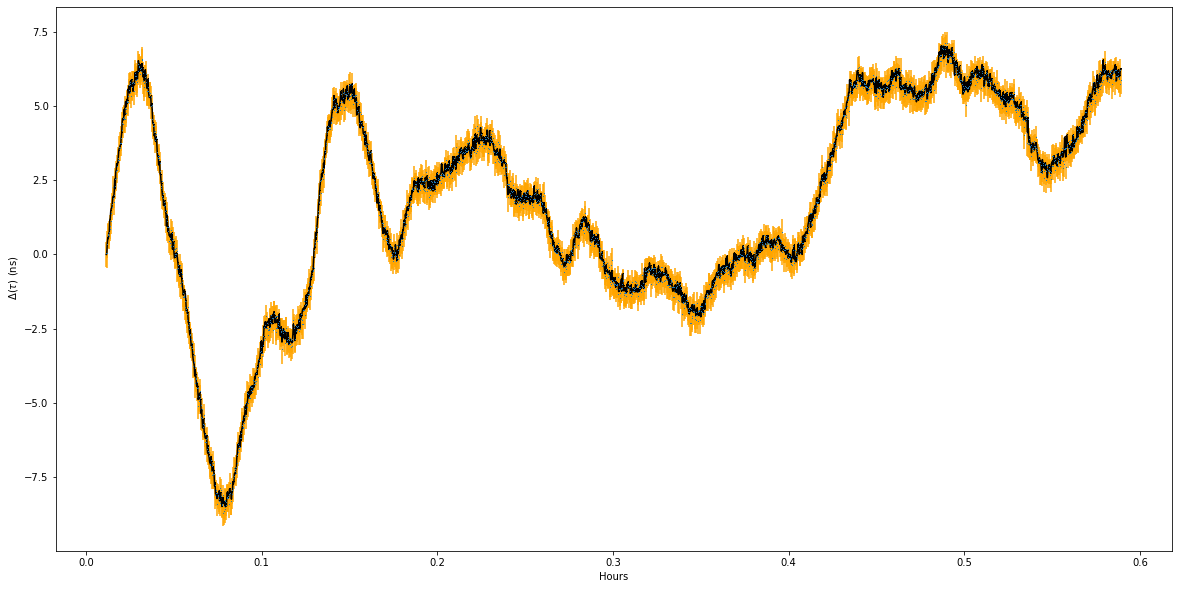

In [14]:
#xlist = [val for val in range(0+1, 2049)]
#xval = [(val*(1.25e-9)/60/60) for val in xlist]

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(tm5101_clock.fpgatime[:2048]*2.56e-6/60/60, (tm5101_clock.taus[:2048])-tm5101_clock.taus[0], c = 'k', marker = ',') #plot taus - taus_0
ax.errorbar(tm5101_clock.fpgatime[:2048]*2.56e-6/60/60, tm5101.tau_shift, yerr=tm4.tau_err, fmt=',', ecolor='orange')
plt.plot()
plt.xlabel("Hours")
plt.ylabel(r" $\Delta(\tau)$ (ns)")

# TM-4 CHIME

In [15]:
chime = acq.check_input(chime_input)
chime.inspect_maser()

Checking input [0, 0, 7] ... 


In [16]:
chime.get_curve_fit()
#5 dont work for some reason?

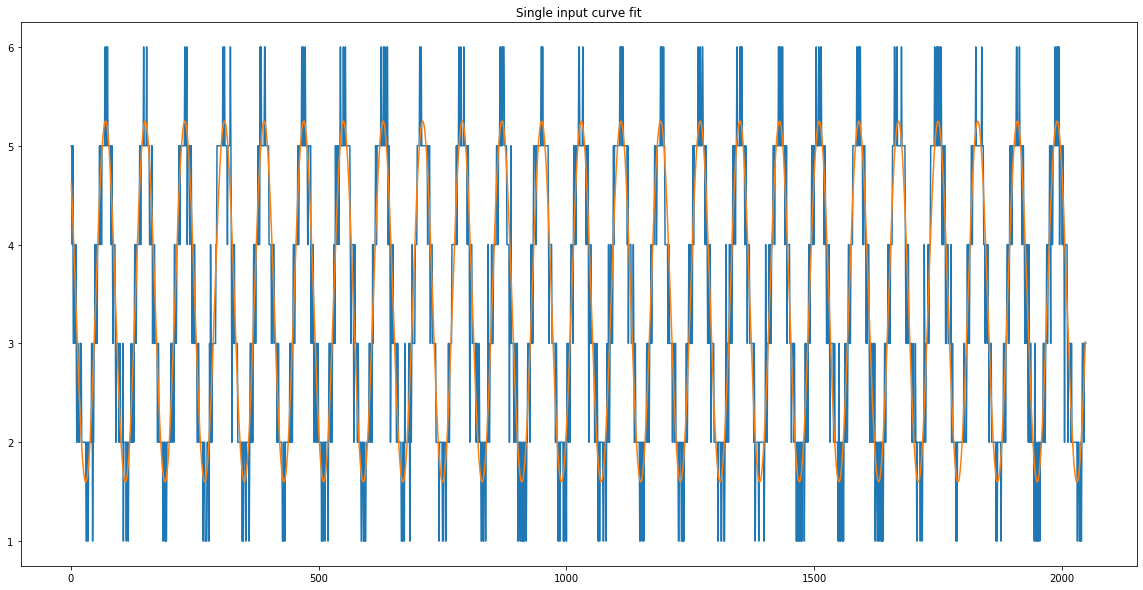

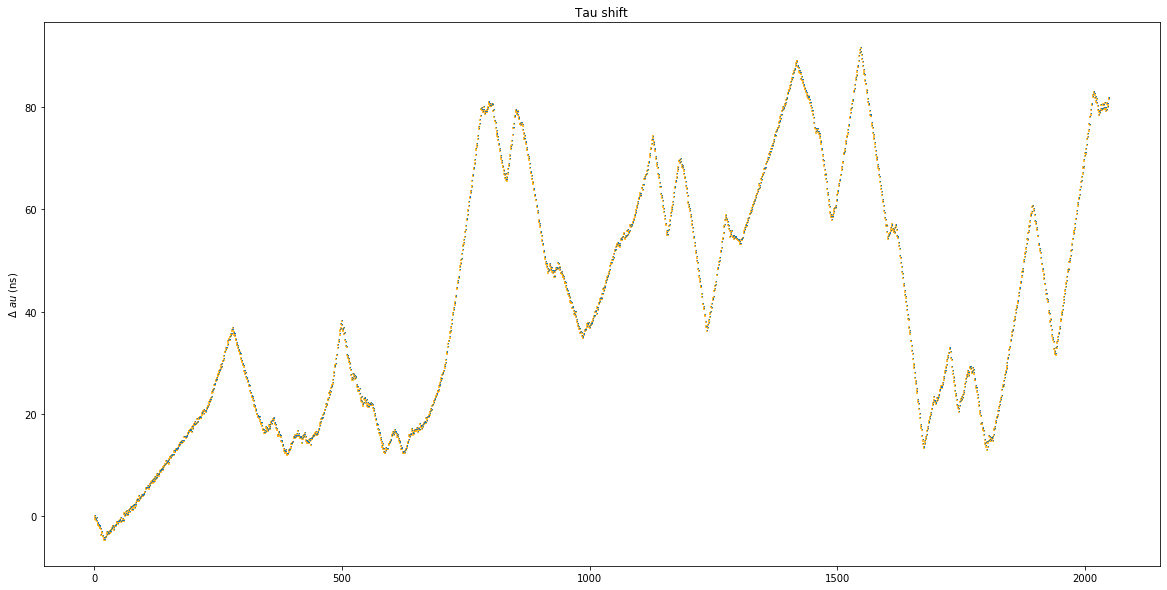

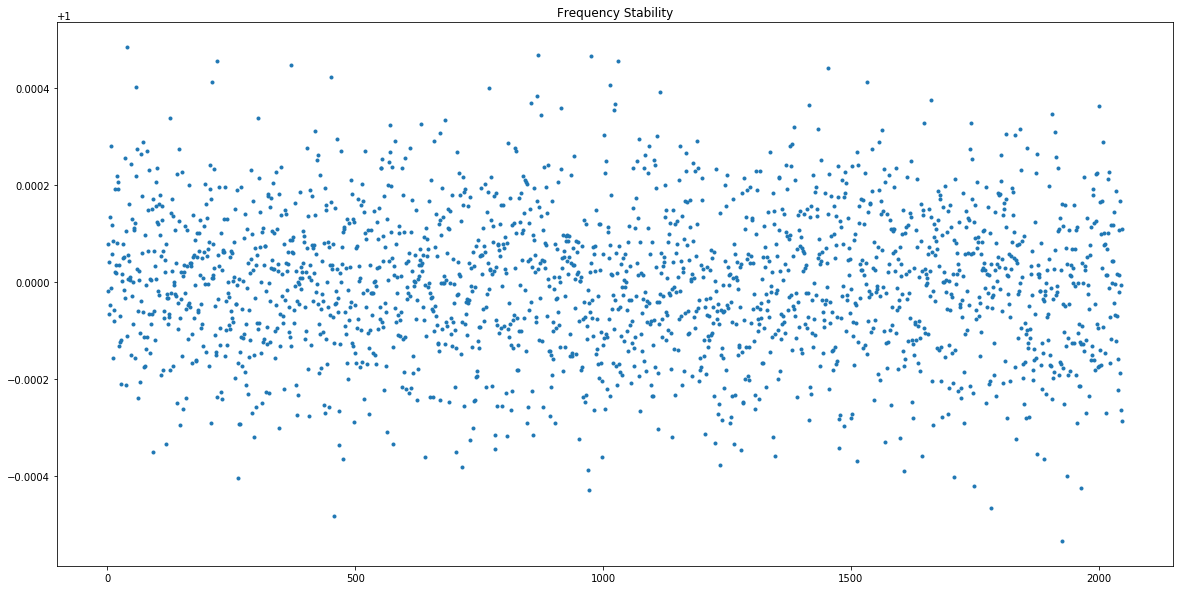

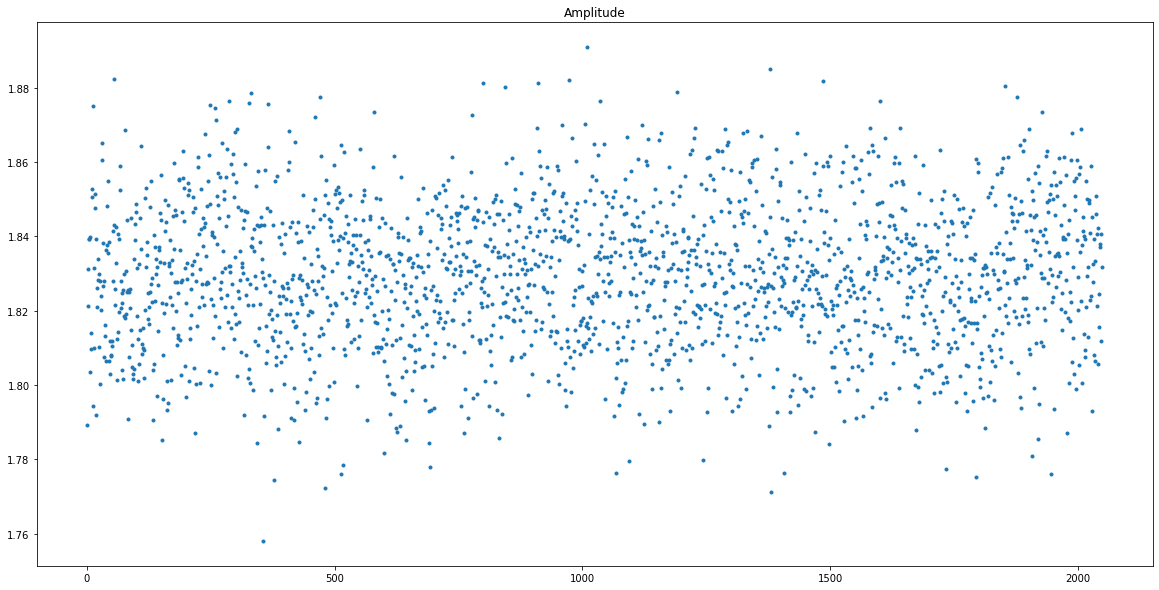

In [17]:
chime.get_single_curve_fit(i=756)

In [18]:
chime_clock = analyse_maser(folder_path, chime_input, 1)

C:\Users\audre\Documents\WVU REU 2022\7.20 1000 fps\000000
Loaded raw acq HDF5 file ... .....................................................................] 0/1
Checking input [0, 0, 7] ... 
Done Computing Delay: ############################################################################] 1/1

DONE reading files and getting delays


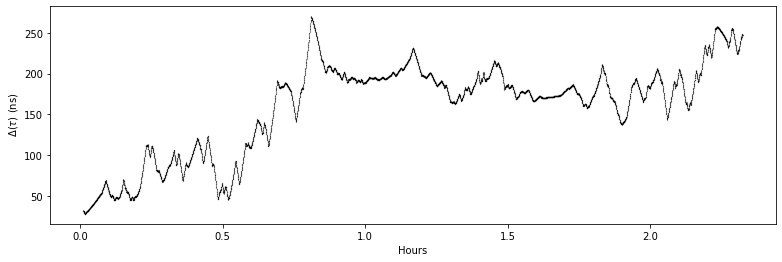

In [19]:
chime_clock.plot_delays()

Text(0, 0.5, ' $\\Delta(\\tau)$ (ns)')

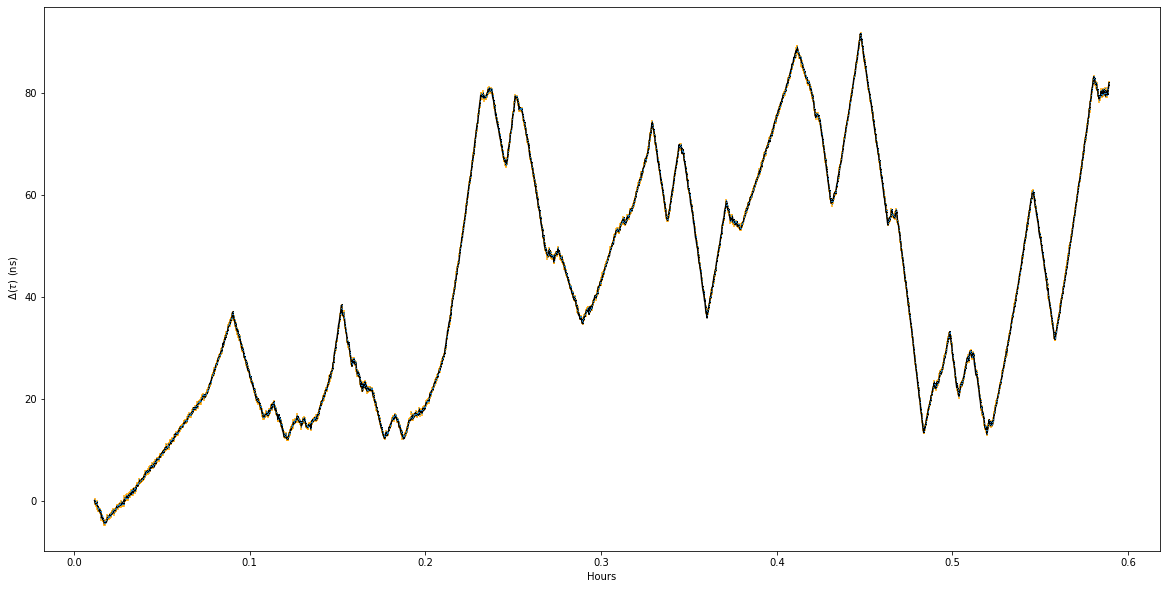

In [20]:
#xlist = [val for val in range(0+1, 2049)]
#xval = [(val*(1.25e-9)/60/60) for val in xlist]

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(chime_clock.fpgatime[:2048]*2.56e-6/60/60, (chime_clock.taus[:2048])-chime_clock.taus[0], c = 'k', marker = ',')
ax.errorbar(chime_clock.fpgatime[:2048]*2.56e-6/60/60, chime.tau_shift, yerr=tm4.tau_err, fmt=',', ecolor='orange')
plt.plot()
plt.xlabel("Hours")
plt.ylabel(r" $\Delta(\tau)$ (ns)")

# Leo

In [21]:
leo = acq.check_input(leo_input)
leo.inspect_maser()

Checking input [0, 0, 15] ... 


In [22]:
leo.get_curve_fit()

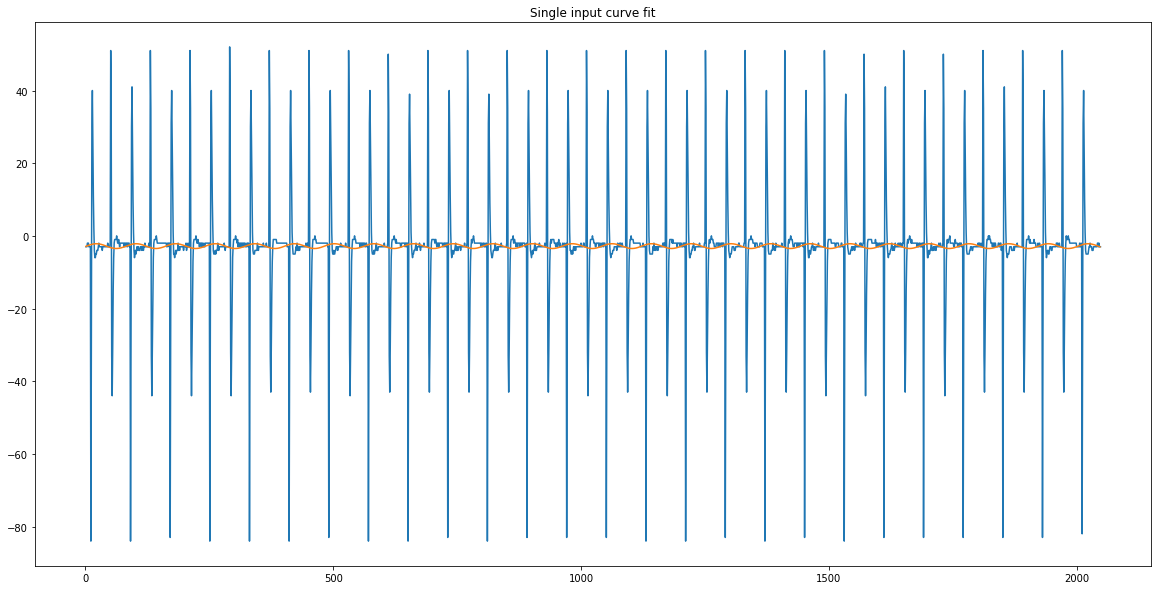

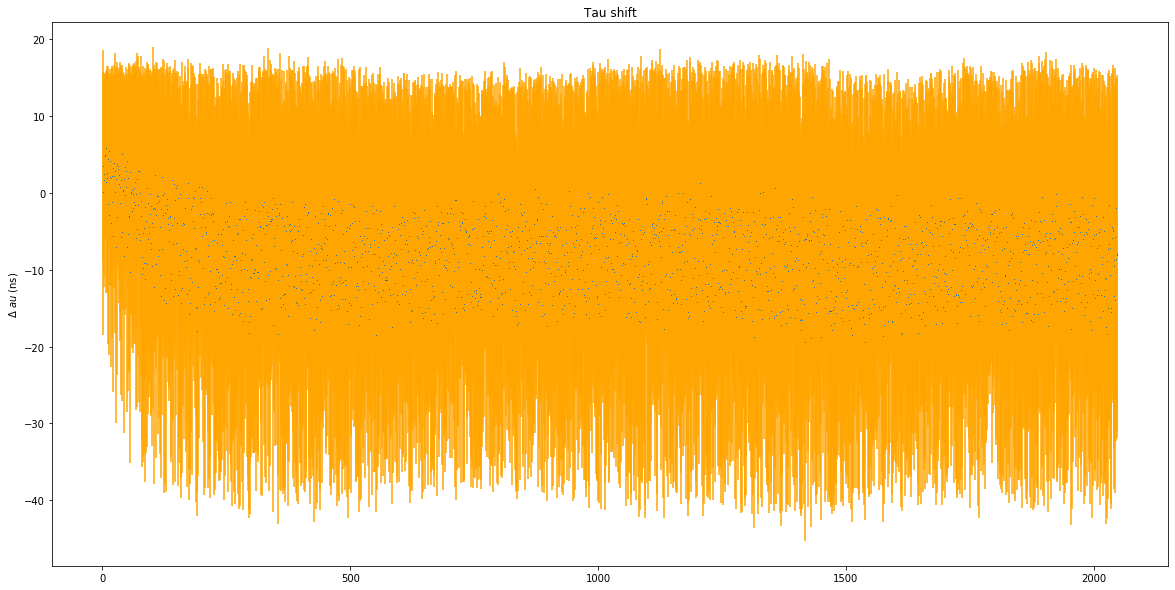

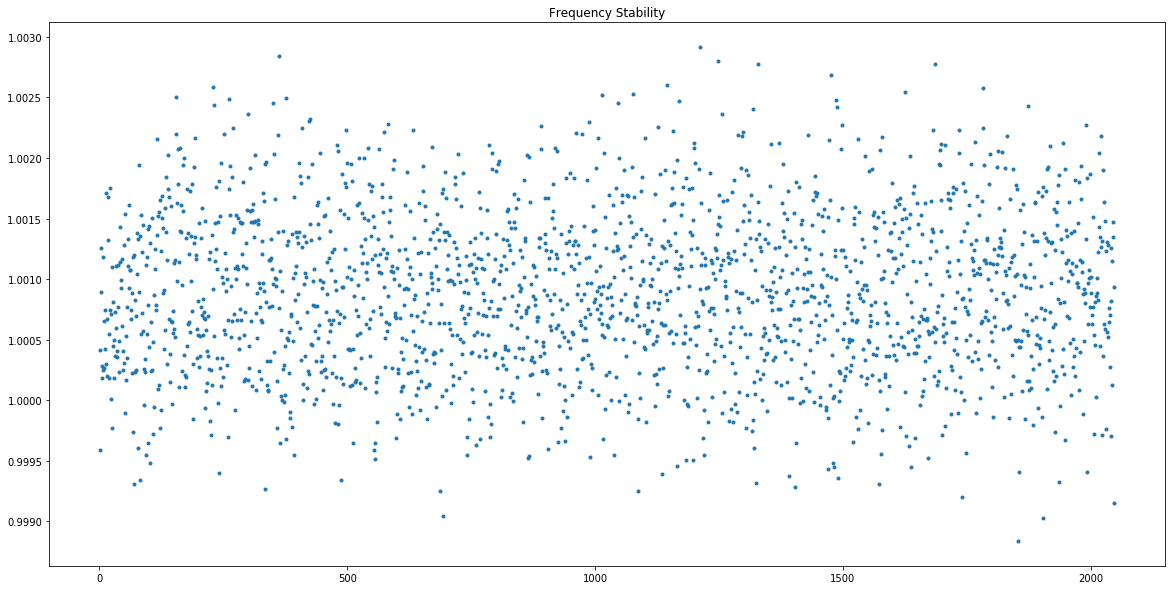

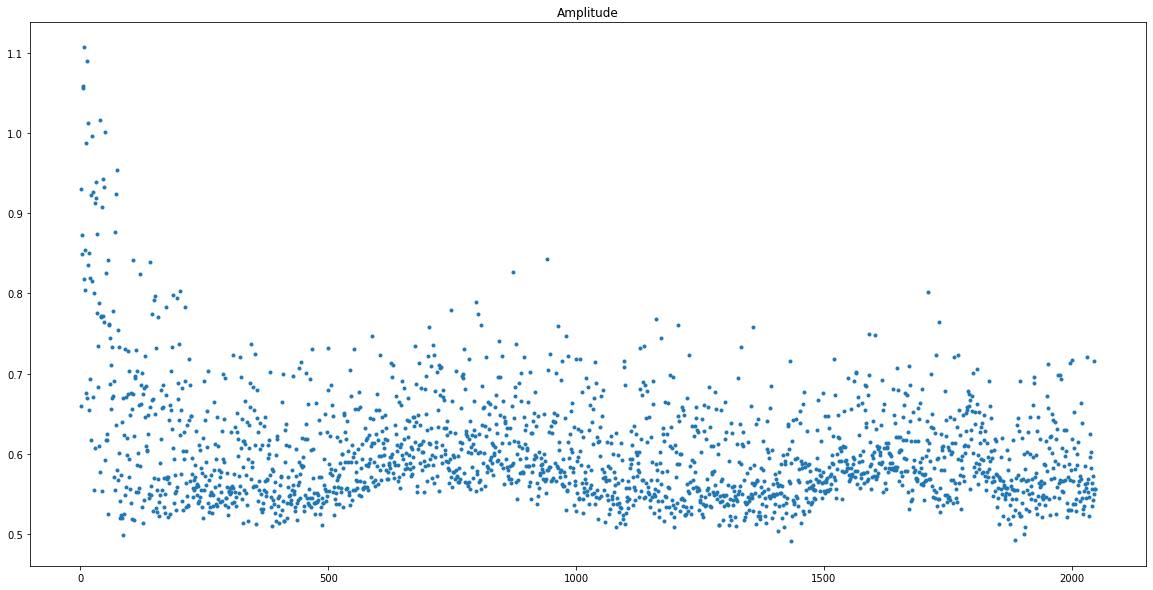

In [23]:
leo.get_single_curve_fit(i=0)